In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the data
#add data
data = pd.read_csv('Housing.csv')
data_bk = data
print('\nShape \n',data.shape)
print('\nColumns \n',data.columns)

print('\nSummary Stat \n',data.describe())

print('\nInfo')
print(data.info())

#check for null values
print('\nNull-Check\n',data.isna().count())

data.head()


Shape 
 (545, 13)

Columns 
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Summary Stat 
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
m

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#convert the categorical variable yes no into numberical values 1,0
data['mainroad'] = data['mainroad'].map({'yes':1,'no':0})
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})
data['basement'] = data['basement'].map({'yes':1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1,'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1,'no':0})

#converting the categorical values into features
#note: if there are n values we will craete n-1 features
furnishingstatus_new = pd.get_dummies(data['furnishingstatus'],drop_first=True) 
furnishingstatus_new.head()

#removing the old column and adding the above dummy features to main data
data.drop(['furnishingstatus'],inplace=True,axis=1)
data = pd.concat([data,furnishingstatus_new],axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [5]:
#creating dervied variables
data['area_per_bedroom'] = data['area']/data['bedrooms']
data['bathroom_per_bedroom'] = data['bathrooms']/data['bedrooms']
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathroom_per_bedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [6]:
#Feature Rescaling
#Important to reduce the scale of feature like price and area from affecting the model
def normalize(x):
    '''
    (x - min) / (max - min)
    '''
    return ((x-np.min(x))/(np.max(x)-np.min(x)))

#normalize each column i data
data = data.apply(normalize)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathroom_per_bedroom
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [7]:
#building the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [30]:
#seperating the features and response vars, and splitting the data
x = data.drop(['price'],axis=1)
y = data['price']

print('\nx-shape\n',x.shape)
print('\ny-shape\n',y.shape)
print('\nx-features\n',(list(x.columns)))

#creating train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36)


x-shape
 (545, 15)

y-shape
 (545,)

x-features
 ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'area_per_bedroom', 'bathroom_per_bedroom']


In [31]:
#handing the multicollinearoty factor using VIF(variance inflation factor)
def vif_cal(x):
    '''
    x=>feature set, without the response variable
    '''
    result = pd.DataFrame(columns=['Var','Vif'])
    cols = x.columns
    for col in cols:
        x_vars = x.drop([col],axis=1)
        y_vars = x[col]
        m = sm.OLS(y_vars,x_vars).fit()
        rsq = m.rsquared
        vif = round(1/(1-rsq),3)
        temp_df = pd.DataFrame([[col,vif]],columns=['Var','Vif'])
        result = result.append(temp_df, ignore_index=True)
    return result.sort_values(by='Vif',axis=0,ascending=False,inplace=False)

In [32]:
print(vif_cal(x))

                     Var     Vif
13      area_per_bedroom  68.707
0                   area  57.516
14  bathroom_per_bedroom  29.250
2              bathrooms  11.106
1               bedrooms  10.683
4               mainroad   7.911
3                stories   2.806
11        semi-furnished   2.614
12           unfurnished   2.383
6               basement   2.046
9                parking   2.008
8        airconditioning   1.769
10              prefarea   1.510
5              guestroom   1.492
7        hotwaterheating   1.098


### RFE

In [33]:
from sklearn.feature_selection import RFE

In [41]:
var_no = 8 #number of feature to select
model = LinearRegression()
rfe = RFE(model,var_no) #here we want the top 9 features from the input data
rfe = rfe.fit(x_train,y_train)
print('\nFeature Support\n',rfe.support_)#all the selected features are shown with value True
print('\nFeature Ranking\n',rfe.ranking_)#all the selected features are shown with rank 1


Feature Support
 [ True False  True  True False False False  True  True  True  True False
 False  True False]

Feature Ranking
 [1 7 1 1 4 6 3 1 1 1 1 8 5 1 2]


In [42]:
col_list = x_train.columns[rfe.support_]
print('\nSelected Columns\n',col_list)


Selected Columns
 Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'area_per_bedroom'],
      dtype='object')


In [50]:
x_train = x_train[col_list]
x_test = x_test[col_list]
ols_model = sm.OLS(y_train,x_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     457.3
Date:                Thu, 16 May 2019   Prob (F-statistic):          2.42e-204
Time:                        13:12:44   Log-Likelihood:                 387.96
No. Observations:                 436   AIC:                            -759.9
Df Residuals:                     428   BIC:                            -727.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area                 0.4210      0.065  

In [51]:
print(vif_cal(x[col_list]))

                Var     Vif
0              area  14.644
7  area_per_bedroom  11.051
2           stories   2.027
5           parking   1.918
4   airconditioning   1.732
1         bathrooms   1.651
6          prefarea   1.386
3   hotwaterheating   1.078


In [52]:
#x_temp = x_test[col_list]
#x_temp.shape
y_pred = ols_model.predict(x_test)

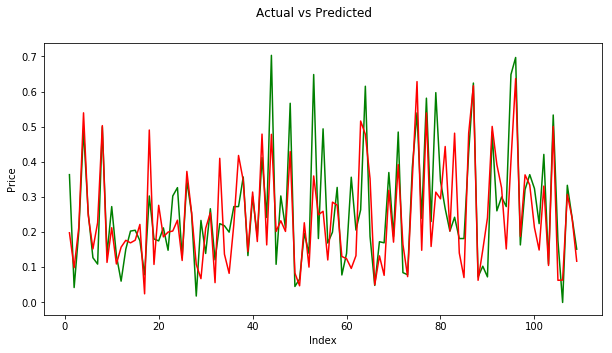

In [53]:
#plotting actual vs predicted
rng = [i for i in range(1,x_test.shape[0]+1)]

fig =plt.figure(figsize=(10,5))
plt.plot(rng,y_test,color='g')
plt.plot(rng,y_pred,color='r')
fig.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

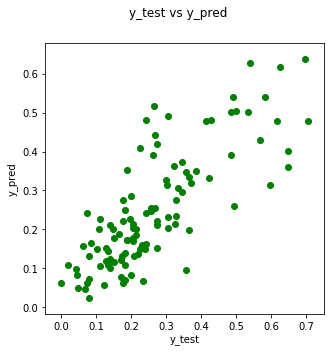

In [55]:
#plotting y_test + y_pred scatter plot to check the spread
fig =plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred,color='g')
fig.suptitle('y_test vs y_pred ')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

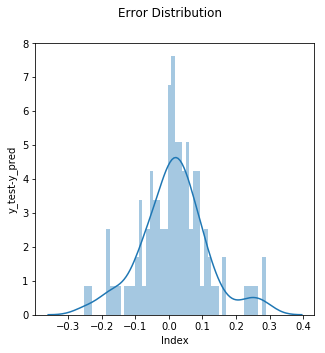

In [56]:
#plotting the distribution of error
fig =plt.figure(figsize=(5,5))
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Distribution')
plt.xlabel('Index')
plt.ylabel('y_test-y_pred')
plt.show()

In [57]:
#calculate model performance metrices
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('\nMSE\n',mse)
print('\nR^2\n',r2)


MSE
 0.010295347771738416

R^2
 0.6017702752216922
